In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn

from loaders import Mnist
mnist = Mnist()

from dist import Spiral

In [3]:
#'states/aae_mnist_spiral4.tar' is good!
state = torch.load('states/aae_mnist_spiral4.tar')
results = state['results']
print(len(results['x_rec']))

3882


In [26]:
from models.base import MLP
hidden = [1000,1000]
batch_norm=True
z_dim=2
enc = MLP([784] + hidden + [z_dim], batch_norm=batch_norm)
dec = MLP([z_dim] + hidden + [784], batch_norm=batch_norm)
adv = MLP([z_dim] + hidden + [1], batch_norm=batch_norm)

enc.load_state_dict(state['enc'])
dec.load_state_dict(state['dec'])
adv.load_state_dict(state['adv'])

enc.eval()
dec.eval()
adv.eval()
None

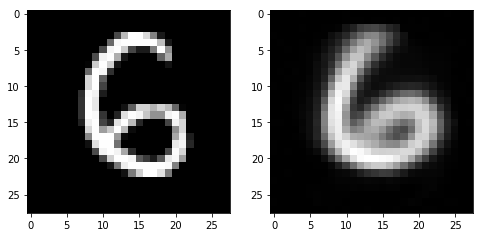

In [4]:
#rec
epoch = -1
n = 4

fig = plt.figure(figsize=(8,12))

ax = fig.add_subplot(121)
ax.imshow(mnist.valid.x[n].reshape(28,28), cmap='gray')

ax = fig.add_subplot(122)
ax.imshow(results['x_rec'][epoch][n].reshape(28,28), cmap='gray')

plt.show()

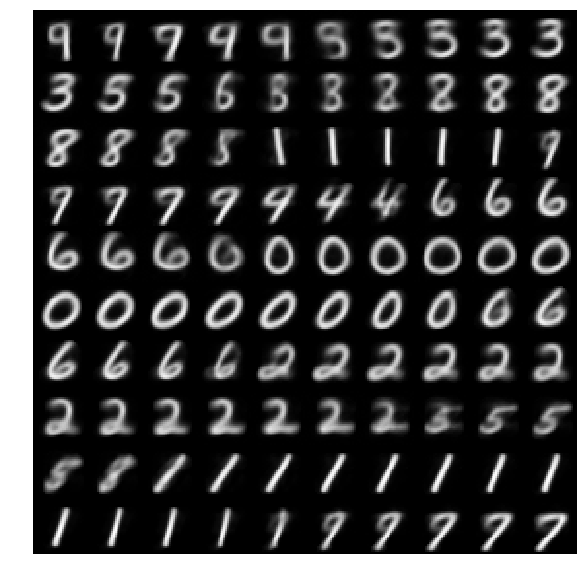

In [49]:
spiral = Spiral(noise=0)
length = spiral.length_arc(spiral.n_turns*2*np.pi)
s = np.arange(0,length,length/100)
z = spiral.length_arc_curve(s)
rec = torch.sigmoid(dec(torch.tensor(z, dtype=torch.float32))).detach().numpy()
im = rec.reshape(10,10,28,28).transpose(0,2,1,3).reshape(280,280)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.imshow(im, cmap='gray')
ax.axis('off')
plt.show()

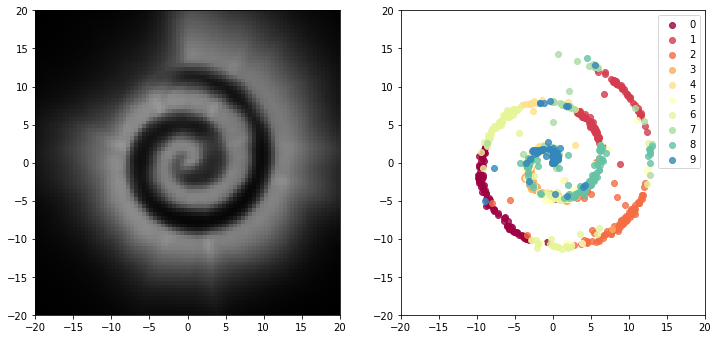

In [50]:
#z space
epoch = -1

fig = plt.figure(figsize=(12,16))

ax = fig.add_subplot(121)
ax.imshow(results['z_hmap'][epoch].reshape(80,80), cmap='gray',
          vmin=0, vmax=1, origin='lower', extent=[-20,20,-20,20])

ax = fig.add_subplot(122)
color = mnist.valid.y[:1000]
cmap = matplotlib.cm.get_cmap('Spectral')
for i in range(10):
    X, Y = results['z_space'][epoch].T
    rgba = cmap(i/10)
    ax.scatter(X[color==i], Y[color==i], c=rgba, label=i, alpha=0.8)
X, Y = results['z_space'][epoch].T
U, V = -results['z_grad'][epoch].T
#ax.quiver(X, Y, U, V)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal')
ax.legend()

plt.show()

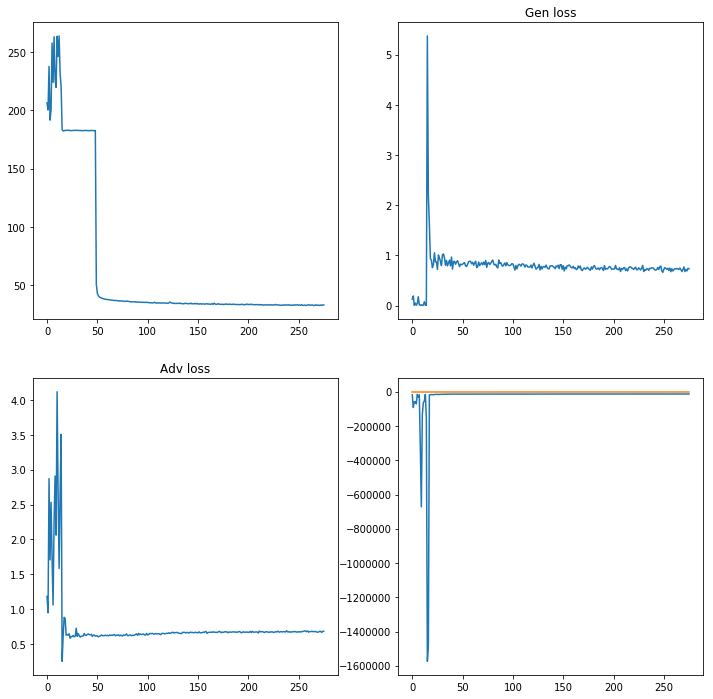

In [290]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(221)
ax.plot(results['rec'])

ax = fig.add_subplot(222)
ax.plot(results['gen'])
ax.set_title('Gen loss')

ax = fig.add_subplot(223)
ax.plot(results['adv'])
ax.set_title('Adv loss')

ax = fig.add_subplot(224)
ax.plot(results['llh'])
ax.plot([-6.0567528 for _ in range(len(results['llh']))])